In [238]:
import pandas as pd
import numpy as np

rawdata = pd.read_csv("BLI_13032019150053284.csv",thousands = ",")
lfs = rawdata.loc[rawdata.Indicator == 'Life satisfaction',:]

In [239]:
gdp = pd.read_csv("WEO_Data (1).csv")
country_stats_temp = pd.merge(lfs,gdp,on='Country')
country_stats_temp = country_stats_temp[['Country','2015','Value']]

In [240]:
country_stats_temp.rename(columns = {'2015':'GDP per captia(USD)','Value':'Life Satisfaction'})

,Country,GDP per captia(USD),Life Satisfaction
0,Australia,"50,961.87",7.3
1,Australia,"50,961.87",7.2
2,Australia,"50,961.87",7.4
3,Australia,"50,961.87",7.5
4,Australia,"50,961.87",7.2
5,Austria,"43,724.03",7.0
6,Austria,"43,724.03",7.0
7,Austria,"43,724.03",7.0
8,Austria,"43,724.03",7.5
9,Austria,"43,724.03",6.9


In [241]:
Nation = pd.Series(country_stats_temp['Country'].values)

In [242]:
name = Nation.unique()
mean_temp = np.zeros(len(name))

In [243]:
for i in range(len(name)):
    tmp = country_stats_temp.loc[country_stats_temp.Country == name[i],:]
    nation_mean = tmp.mean().Value
    mean_temp[i] = nation_mean

In [260]:
country_stats = pd.DataFrame({'Country':name,'Life Satisfaction':mean_temp})
country_stats = pd.merge(country_stats,gdp,on='Country')
country_stats = country_stats[['Country','2015','Life Satisfaction']]
country_stats = country_stats.rename(columns = {'2015':'GDP per captia(USD)','Value':'Life Satisfaction'})
for i in range(len(name)):
    char_tmp = country_stats[["GDP per captia(USD)"]].values[i]
    char_tmp = str(char_tmp)
    char_tmp = char_tmp.replace("\'","")
    char_tmp = char_tmp.replace("[","")
    char_tmp = char_tmp.replace("]","")
    char_tmp = char_tmp.replace(",","")
    char_tmp = float(char_tmp)
    country_stats.loc[i,"GDP per captia(USD)"] = char_tmp
country_stats[["GDP per captia(USD)"]]=country_stats[["GDP per captia(USD)"]].astype(int)

到这一步完成了数据的预处理。从两个网站获取的数据是冗余的，我们需要的只是life satisfaction和GDP per casptia,DataFrame用的不是太好，按理说应该写成function来调用，这一步也略过了

In [272]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [273]:
#Load the data
X = np.c_[country_stats["GDP per captia(USD)"]]
Y = np.c_[country_stats["Life Satisfaction"]]


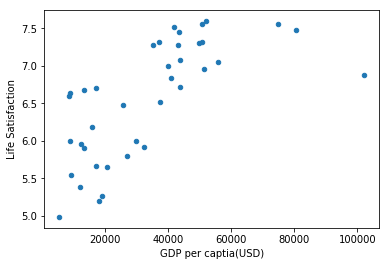

Signature:      country_stats.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
Type:           FramePlotMethods
String form:    <pandas.plotting._core.FramePlotMethods object at 0x000001B072C02470>
File:           d:\ana\lib\site-packages\pandas\plotting\_core.py
Docstring:     
DataFrame plotting accessor and method

Examples
--------
>>> df.plot.line()
>>> df.plot.scatter('x', 'y')
>>> df.plot.hexbin()

These plotting methods can also be accessed by calling the accessor as a
method with the ``kind`` argument:
``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
Call docstring:
Make plots of DataFrame using matplotlib / pylab.

*New in version 0.1

In [274]:
country_stats.plot?
country_stats.plot(kind='scatter',x = "GDP per captia(USD)", y = "Life Satisfaction")
plt.show()

In [275]:
linear_Re = LinearRegression()

In [276]:
linear_Re.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [278]:
X_new = [[22587]] #Cyprus' GDP per captia
print(linear_Re.predict(X_new))

[[6.27874522]]
